(20L, 733L)


TypeError: 'AxesSubplot' object does not support indexing

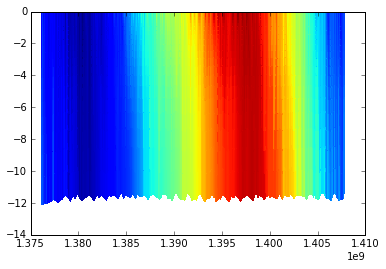

In [6]:
%matplotlib inline

import netCDF4
import matplotlib.pyplot as plt
import romspy
import numpy as np
import pandas as pd
from datetime import datetime

stafile = 'Z:/roms/Apps/OB500_fennelP/NL12/ob500_sta.nc'
obsfile = 'F:/okada/Dropbox/Data/ob500_obs_2012_obweb-3.nc'

sta = netCDF4.Dataset(stafile, 'r')
obs = netCDF4.Dataset(obsfile, 'r')

def plot(ax, vname, station, depth, cff=1.0):
    sta_time = sta.variables['ocean_time'][:]
    #sta_time = netCDF4.num2date(sta_time, romspy.JST)
    sta_h = sta.variables['h'][station-1]
    sta_zeta = sta.variables['zeta'][:,station-1]
    sta_csr = sta.variables['Cs_r'][:]
    sta_H, sta_csr = np.meshgrid((sta_h + sta_zeta[:]), sta_csr)
    sta_depth = sta_H * sta_csr
    sta_time2 = np.zeros_like(sta_depth)
    print sta_time2.shape
    
    for k in range(20):
        sta_time2[k,:] = sta_time
    sta_var = sta.variables[vname][:,station-1,:] * cff
    ax.pcolor(sta_time2, sta_depth, sta_var.T)
    
    for k in [19, 14, 9, 4, 0]:
        d = k
        ax[0].plot(sta_time, sta_var[:,k], '-', color=plt.cm.RdYlBu(k/19.0), label='k={}'.format(k+1))

    var = obs.variables
    obs_type = var['obs_type'][:]
    obs_station = var['obs_station'][:]
    varids = {'temp':6, 'salt':7, 'chlorophyll':10, 'oxygen': 15}
    index = np.where((obs_type==varids[vname]) & (obs_station==station))
    obs_time = var['obs_time'][index]
    obs_time = netCDF4.num2date(obs_time, romspy.JST_days)
    obs_depth = var['obs_depth'][index]
    obs_value = var['obs_value'][index] * cff
    data = {"time":obs_time, "depth":obs_depth, "value":obs_value}
    df = pd.DataFrame(data)
    for d in range(0,-13,-2):
        t = df.time[df.depth==d]
        v = df.value[df.depth==d]
        ax[1].plot(t, v, '-', color=plt.cm.RdYlBu((12.0+d)/12.0), label='{}m'.format(d))

    ax[0].legend()
    ax[1].legend()
    ax[0].set_title(vname+'(model)')
    ax[1].set_title(vname+'(observation)')
    ax[0].grid()
    ax[1].grid()
    ax[0].set_xlim(datetime(2012,1,1,0), datetime(2013,1,1,0))
    ax[1].set_xlim(datetime(2012,1,1,0), datetime(2013,1,1,0))

def sta_plot(station, depth):
    fig, ax = plt.subplots(4, 2, figsize=[20,20])
    plot(ax[0], 'temp', station, depth)
    plot(ax[1], 'salt', station, depth)
    plot(ax[2], 'chlorophyll', station, depth, cff=1.0)
    plot(ax[3], 'oxygen', station, depth, cff=32.0/1000)
    ax[0][0].set_ylim(5.0,35.0)
    ax[0][1].set_ylim(5.0,35.0)
    ax[1][0].set_ylim(10.0,35.0)
    ax[1][1].set_ylim(10.0,35.0)
    ax[2][0].set_ylim(0.0,10.0)
    ax[2][1].set_ylim(0.0,10.0)
    ax[3][0].set_ylim(0.0,20.0)
    ax[3][1].set_ylim(0.0,20.0)
    
#sta_plot(12, depth=1)
plot(ax=plt.gca(), vname='temp', station=12, depth=1, cff=1.0)

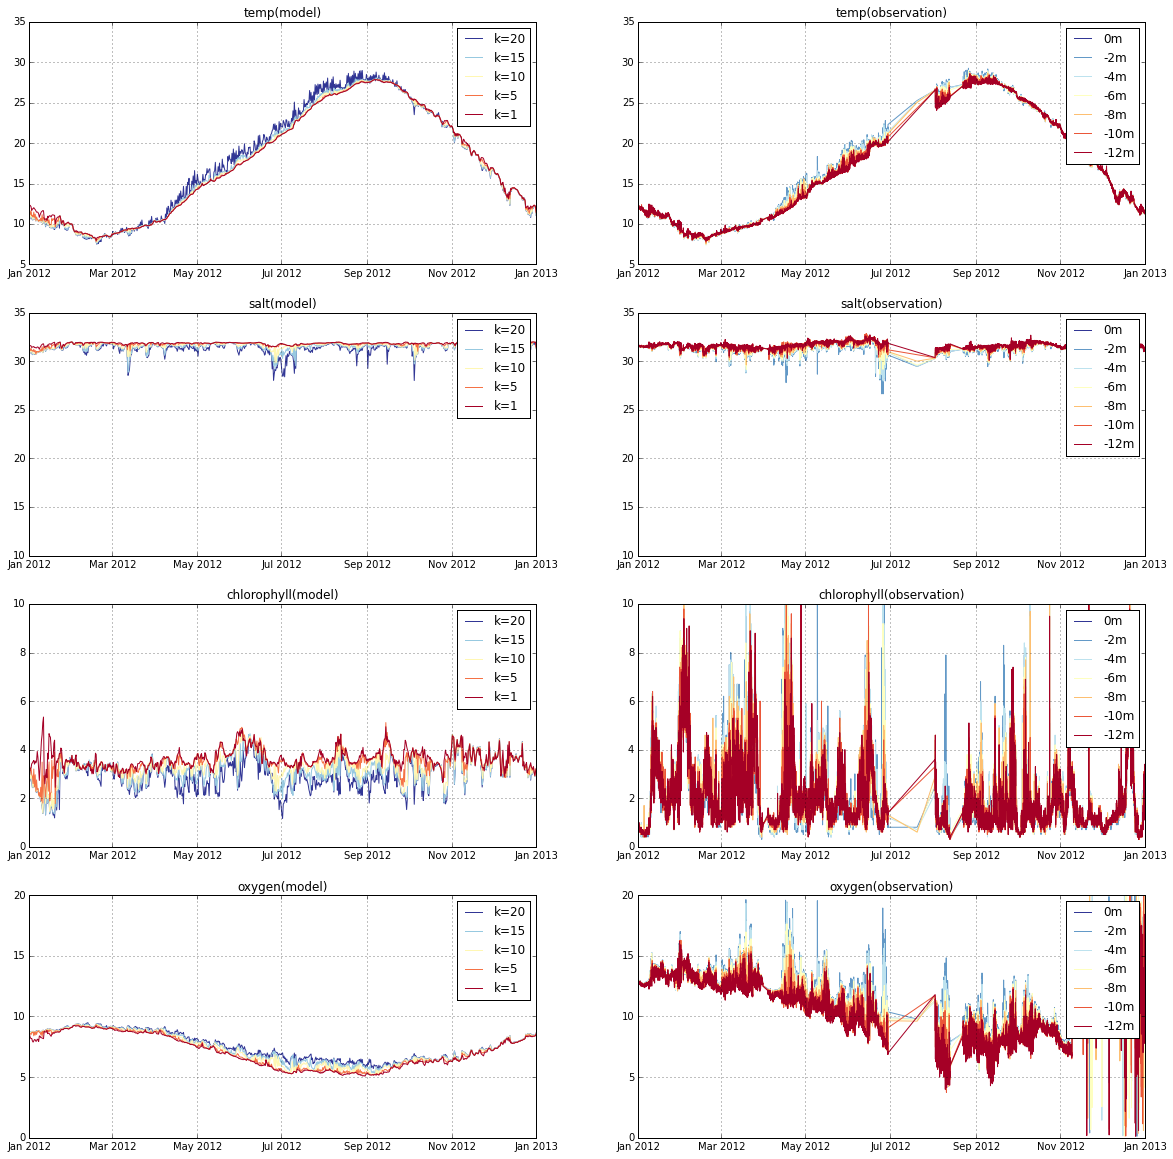

In [7]:
sta_plot(3)

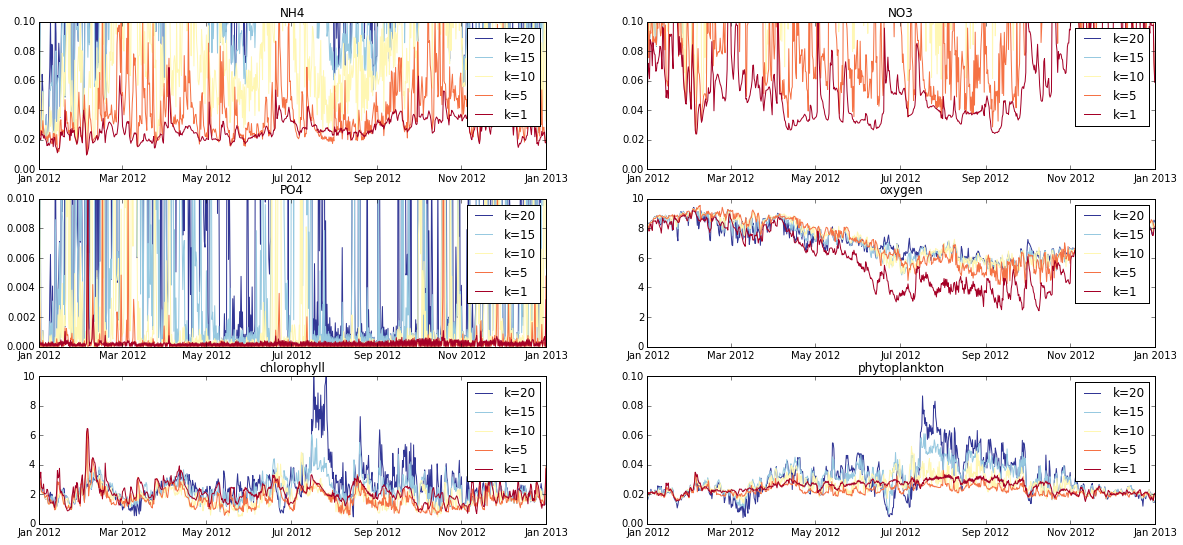

In [28]:
sta_plot(4)